## Opening LIF files

When working with microscopy image data, many file formats are circulating such as the Leica Image Format (LIF). In this notebook, we will open a `.lif` file using the [`readlif` library](https://pypi.org/project/readlif/).

It can be installed like this from the terminal:

```
pip install readlif
```

After installing it, it can be imported.

In [1]:
from readlif.reader import LifFile

import os
import requests
from skimage.io import imshow
import numpy as np

As example dataset, we will use an image shared by [Gregory Marquart and Harold Burgess](https://zenodo.org/record/3382102#.Y57rFnbMJaQ) under [CC-BY 4.0 license](https://creativecommons.org/licenses/by/4.0/legalcode). We need to download it first.

In [2]:
filename = "../../data/y293-Gal4_vmat-GFP-f01.lif"
url = 'https://zenodo.org/record/3382102/files/y293-Gal4_vmat-GFP-f01.lif?download=1'

if not os.path.isfile(filename):
    # only download the file if we don't have it yet
    response = requests.get(url)
    open(filename, "wb").write(response.content)

At this point the file should be on our computer and can be opened like this.

In [3]:
file = LifFile(filename)
file

'LifFile object with 1 image'

In [4]:
lif_image = file.get_image(0)
lif_image

'LifImage object with dimensions: Dims(x=616, y=500, z=86, t=1, m=1)'

From the LifImage, we can get individual frames as [PIL](https://pypi.org/project/PIL/) images.

In [5]:
pil_image = lif_image.get_frame(z=0)
type(pil_image)

PIL.Image.Image

Finally, these 2D PIL images can be converted into numpy arrays. Which allows us eventually to take a look at the image.

In [6]:
np_image = np.array(pil_image)
np_image.shape

(500, 616)

C:\Users\haase\mambaforge\envs\bio39\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


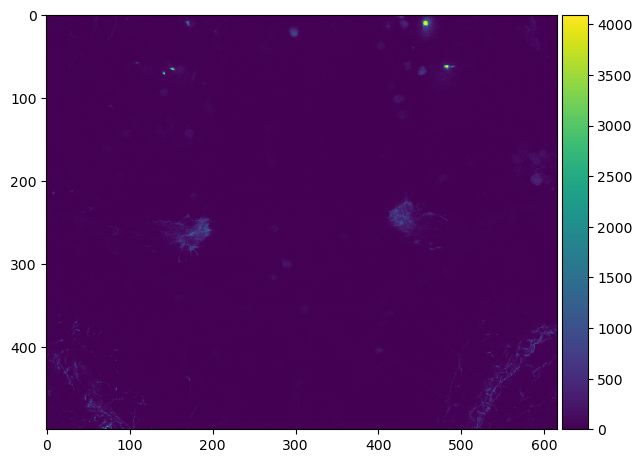

In [7]:
imshow(np_image)

To access all pixels in our 3D image, we should first have a look in the metadata of the file.

In [8]:
lif_image.info

{'dims': Dims(x=616, y=500, z=86, t=1, m=1),
 'display_dims': (1, 2),
 'dims_n': {1: 616, 2: 500, 3: 86},
 'scale_n': {1: 2.1354804344851965,
  2: 2.135480168493237,
  3: 0.9929687300128537},
 'path': 'Experiment_002/',
 'name': 'Series011',
 'channels': 2,
 'scale': (2.1354804344851965, 2.135480168493237, 0.9929687300128537, None),
 'bit_depth': (12, 12),
 'mosaic_position': [],
 'channel_as_second_dim': False,
 'settings': {}}

For example, it might be useful later to know the voxel size in z/y/x order.

In [9]:
voxel_size = lif_image.info['scale'][2::-1]
voxel_size

(0.9929687300128537, 2.135480168493237, 2.1354804344851965)

We can also read out how many slices the 3D stack has.

In [10]:
num_slices = lif_image.info['dims'].z
num_slices

86

This information allows us to write a convenience function that allows converting the LIF image into a 3D numpy image stack.

In [11]:
def lif_to_numpy_stack(lif_image):
    num_slices = lif_image.info['dims'].z
    
    return np.asarray([np.array(lif_image.get_frame(z=0)) for z in range(num_slices)])

In [12]:
image_stack = lif_to_numpy_stack(lif_image)
image_stack.shape

(86, 500, 616)

This image stack can then be used for example to visualize a maximum intensity projection along Z.

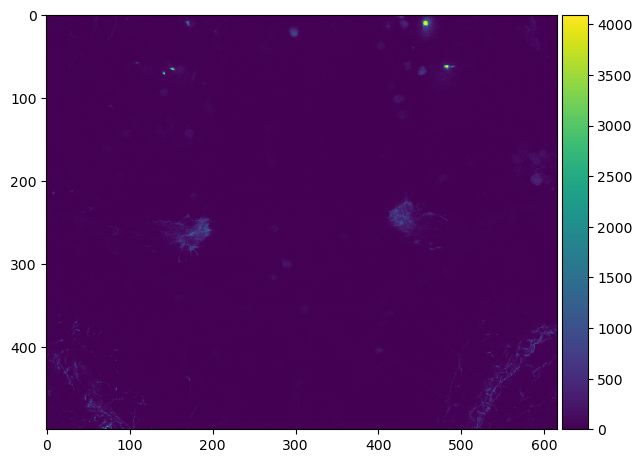

In [13]:
imshow(np.max(image_stack, axis=0))